In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from utils import PkdbModel
from analysis import PlotCategory, create_plots



In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def all_idx(data):
    return pd.Series(True, index=data.index)


In [4]:
groups = PkdbModel("groups",destination="1-preprocessed")
groups.read()

In [5]:
individual = PkdbModel("individuals",destination="1-preprocessed")
individual.read()

In [6]:
results = PkdbModel("all_complete",destination="2-merged")
results.read()

In [7]:
results.data[results.data["measurement_type"]== "metabolic ratio"]
phenotypes = results.data[results.data["measurement_type"]== "metabolic phenotype"][["choice","group_pk","individual_pk"]]


In [8]:
phenotype_dict = {}
for phenotype in ["em","im","um","pm"]:
    data = {}
    
    data["groups"] = list(phenotypes[phenotypes["choice"] == phenotype]["group_pk"].dropna().unique())
    parents_in_group = True
    while parents_in_group:
        parents = groups.data[groups.data[('general', 'parent_pk')].isin(data["groups"])]
        parents_in_group = not parents.empty
        if parents_in_group:
            data["groups"].extend(list(parents[('general', 'parent_pk')]))
   
    data["individuals"] = list(phenotypes[phenotypes["choice"] == phenotype]["individual_pk"].dropna().unique())
    
    
    this_individuals = individual.data[individual.data[('general', 'group_pk')].isin(data["groups"])]
    data["individuals"].extend(list(this_individuals.reset_index()["subject_pk"].unique()))
    
    
    phenotype_dict[phenotype] = data

    

In [9]:
genotype_to_phenotype = {}
genotype_to_phenotype["pm"] = ["*4/*4","*3/*4", "*5/*5"]
genotype_to_phenotype["um"] = ["*1x2/*1"]
genotype_to_phenotype["em"] = ["*1/*1","*1/*4","*1/*41","10/*10","*1/*10", "*17/*17","*29/*29"]
genotype_to_phenotype["im"] = ["*7/*41","*x/*4" ,"*4/*41",]

In [10]:

def em_idx(data):
    return ((data["group_pk"].isin(phenotype_dict["em"]["groups"]))  \
           | (data["individual_pk"].isin(phenotype_dict["em"]["individuals"])) \
           | (data[("cyp2d6 phenotype","choice")] == "em") \
           | (data[("cyp2d6 genotype","choice")].isin(genotype_to_phenotype["em"])))

def im_idx(data):
    return ((data["group_pk"].isin(phenotype_dict["im"]["groups"]))  \
           | (data["individual_pk"].isin(phenotype_dict["im"]["individuals"])) \
           |( data[("cyp2d6 phenotype","choice")] == "im") \
           | (data[("cyp2d6 genotype","choice")].isin(genotype_to_phenotype["im"])))


def pm_idx(data):
    return ((data["group_pk"].isin(phenotype_dict["pm"]["groups"]))  \
           | (data["individual_pk"].isin(phenotype_dict["pm"]["individuals"]))\
           |( data[("cyp2d6 phenotype","choice")] == "pm")\
           | (data[("cyp2d6 genotype","choice")].isin(genotype_to_phenotype["pm"])))


def um_idx(data):
    return ((data["group_pk"].isin(phenotype_dict["um"]["groups"]) ) \
           | (data["individual_pk"].isin(phenotype_dict["um"]["individuals"])) \
           | (data[("cyp2d6 phenotype","choice")] == "um")\
           | (data[("cyp2d6 genotype","choice")].isin(genotype_to_phenotype["um"])))

          

def rest_idx(data):
    return (~em_idx(data) & ~im_idx(data) & ~pm_idx(data) & ~um_idx(data))    

In [11]:
colors = sns.color_palette("colorblind",n_colors=5)
categories_all = [              
              PlotCategory(name="UNKOWN", color="darkgray", marker='o', data_idx=rest_idx),
              PlotCategory(name="EM", color=colors[0], marker='o', data_idx=em_idx),
                PlotCategory(name="IM", color=colors[1], marker='o', data_idx=im_idx),
              PlotCategory(name="PM", color=colors[2], marker='o', data_idx=pm_idx),
              PlotCategory(name="UM", color=colors[3], marker='o', data_idx=um_idx),

             
             ]

In [12]:
#data_class.data[data_class.data["study"]=="Wu2013"][["unit","mean","calculated",('subject_name', '')]]
#data_class.data[data_class.data["unit"]=="liter / hour / kilogram"][["study","unit","mean","calculated","value",('subject_name', '')]].sort_values("value")

UNKOWN     I: 10  G: 16 TI: 200
EM         I: 16  G: 11 TI: 121
IM         I: 3   G: 0  TI: 3  
PM         I: 8   G: 5  TI: 51 
UM         I: 1   G: 1  TI: 13 
UNKOWN     I: 10  G: 5  TI: 47 
EM         I: 14  G: 6  TI: 68 
IM         I: 3   G: 0  TI: 3  
PM         I: 7   G: 4  TI: 47 
UM         I: 1   G: 0  TI: 1  
UNKOWN     I: 10  G: 5  TI: 47 
EM         I: 14  G: 6  TI: 68 
IM         I: 3   G: 0  TI: 3  
PM         I: 7   G: 4  TI: 47 
UM         I: 1   G: 0  TI: 1  
UNKOWN     I: 10  G: 5  TI: 47 
EM         I: 14  G: 6  TI: 68 
IM         I: 3   G: 0  TI: 3  
PM         I: 7   G: 4  TI: 47 
UM         I: 1   G: 0  TI: 1  
UNKOWN     I: 10  G: 25 TI: 351
EM         I: 23  G: 13 TI: 137
IM         I: 3   G: 0  TI: 3  
PM         I: 9   G: 7  TI: 65 
UM         I: 1   G: 1  TI: 13 
UNKOWN     I: 10  G: 9  TI: 91 
EM         I: 14  G: 7  TI: 74 
IM         I: 3   G: 0  TI: 3  
PM         I: 7   G: 5  TI: 57 
UM         I: 1   G: 0  TI: 1  
UNKOWN     I: 10  G: 9  TI: 91 
EM      

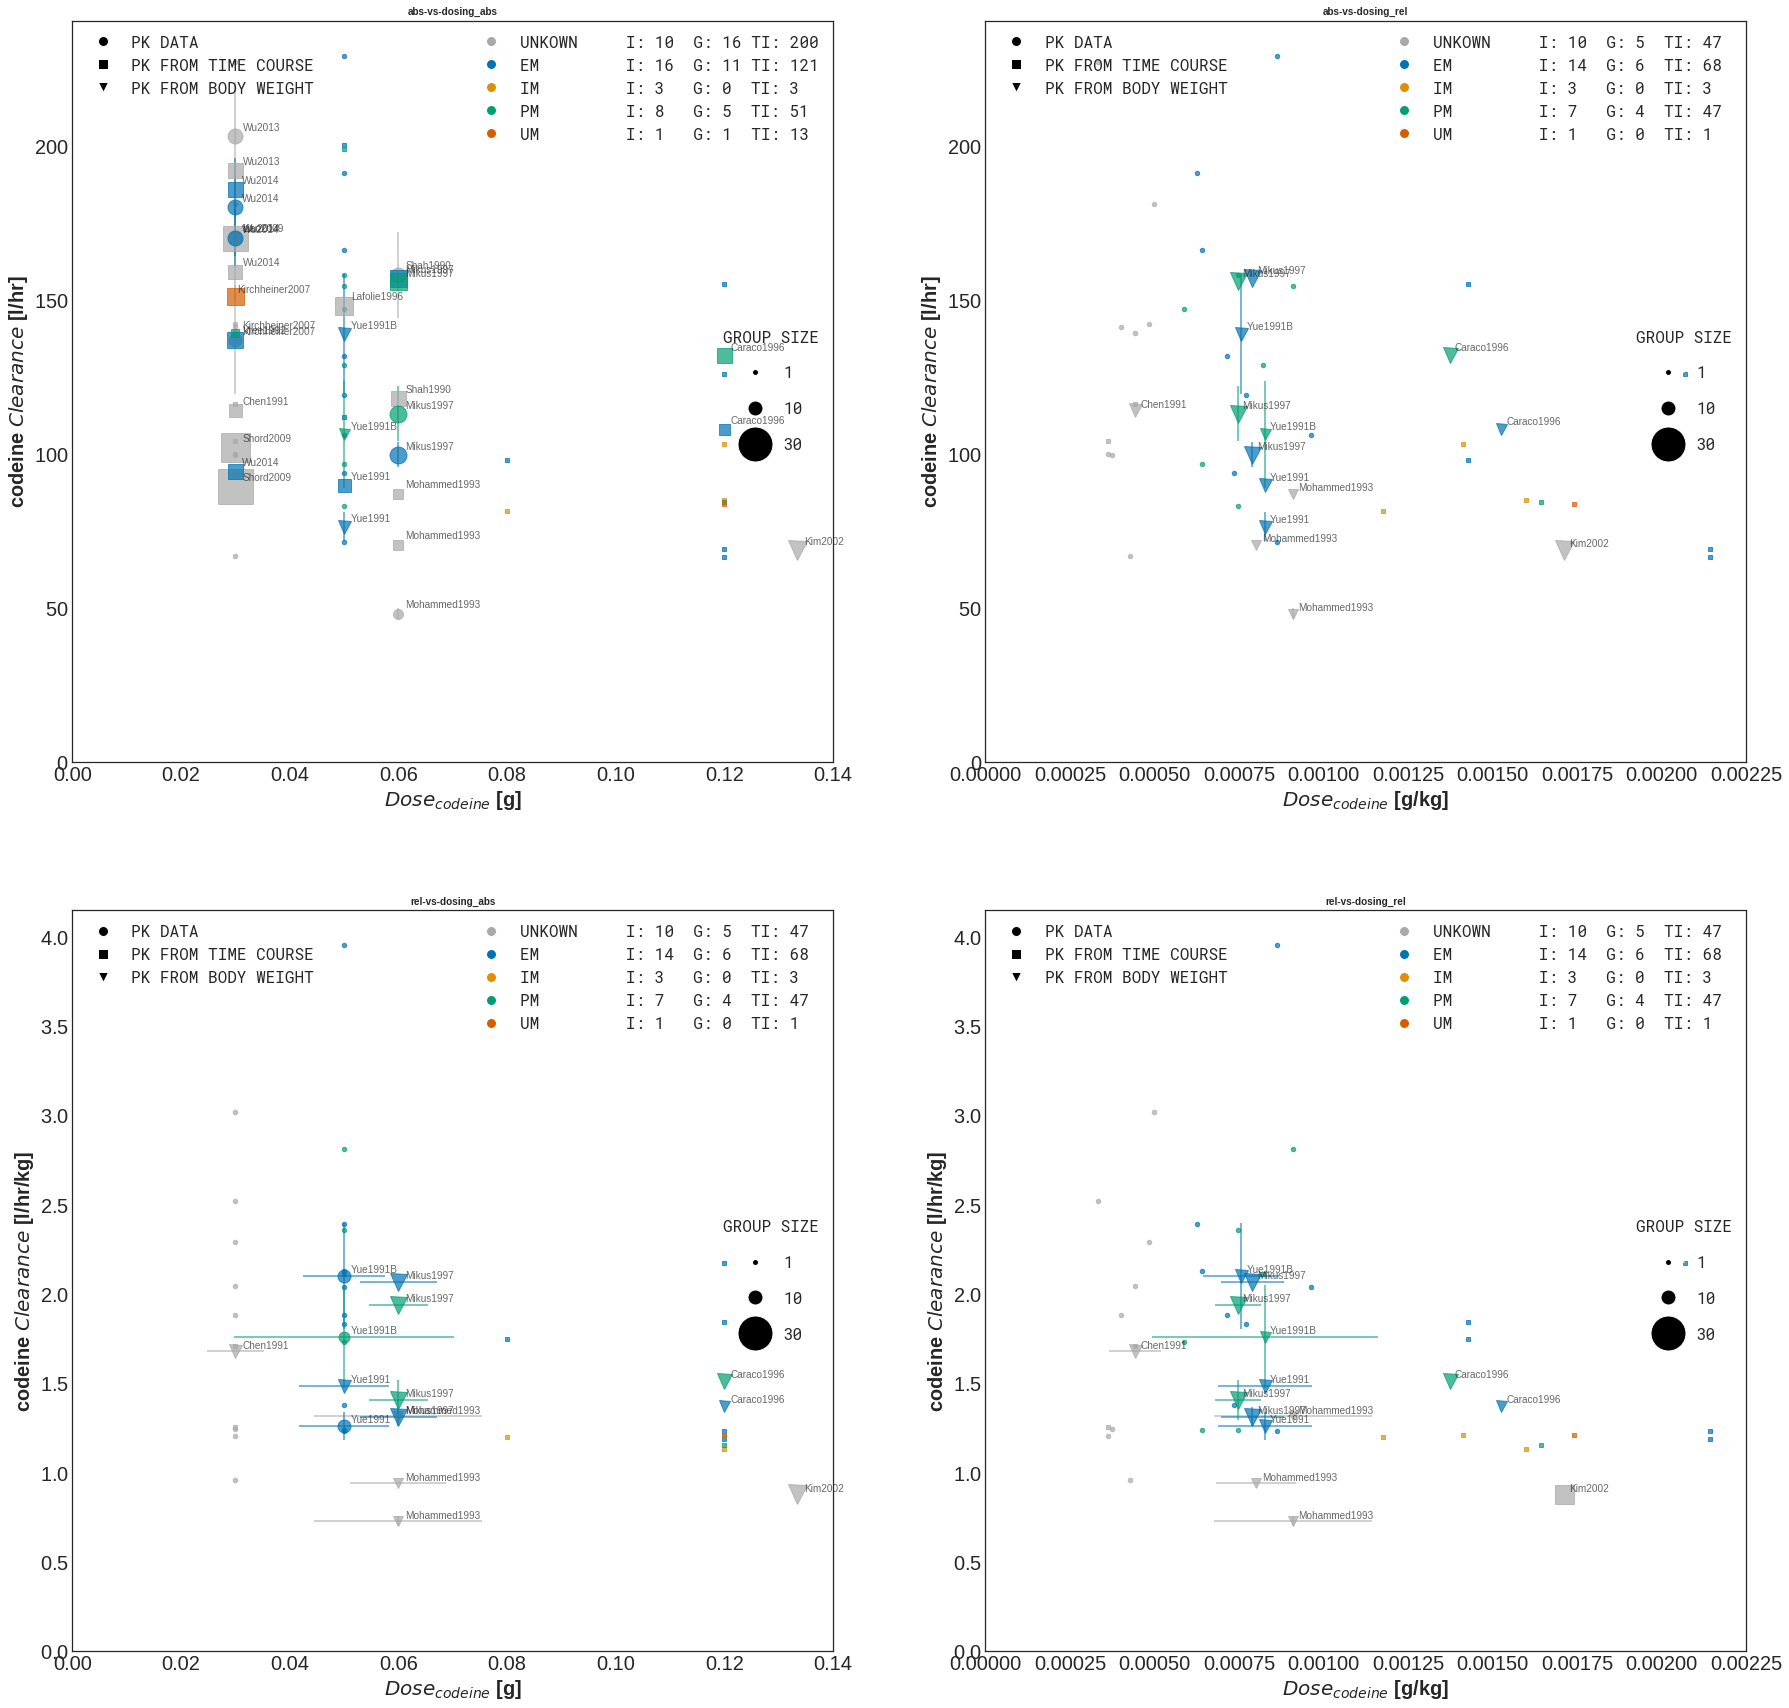

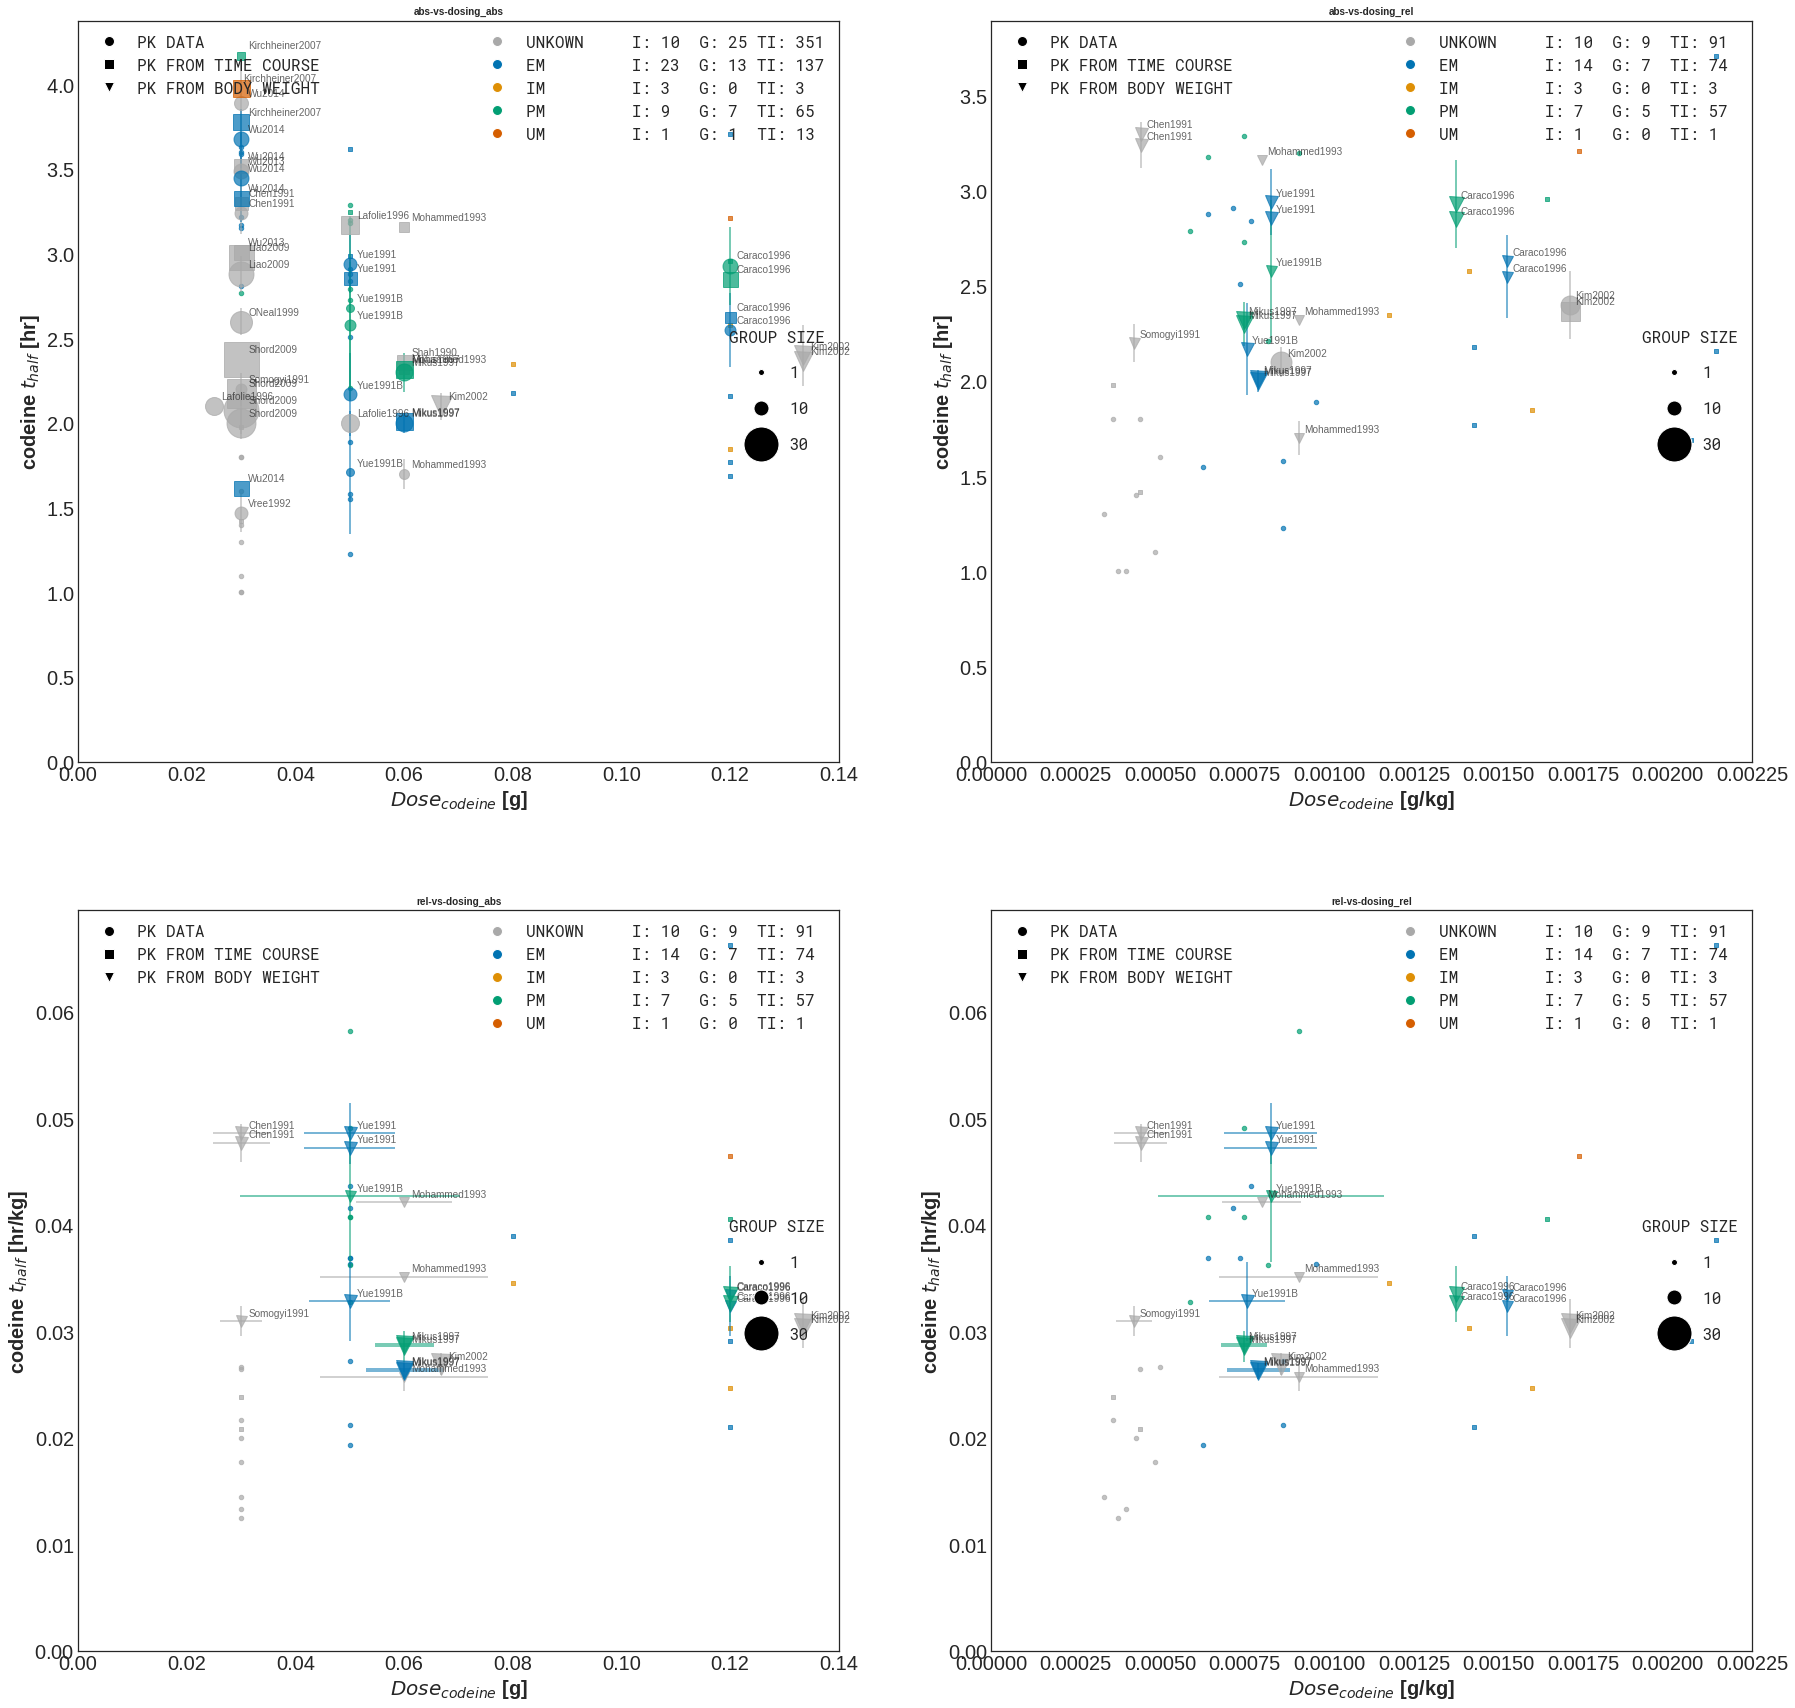

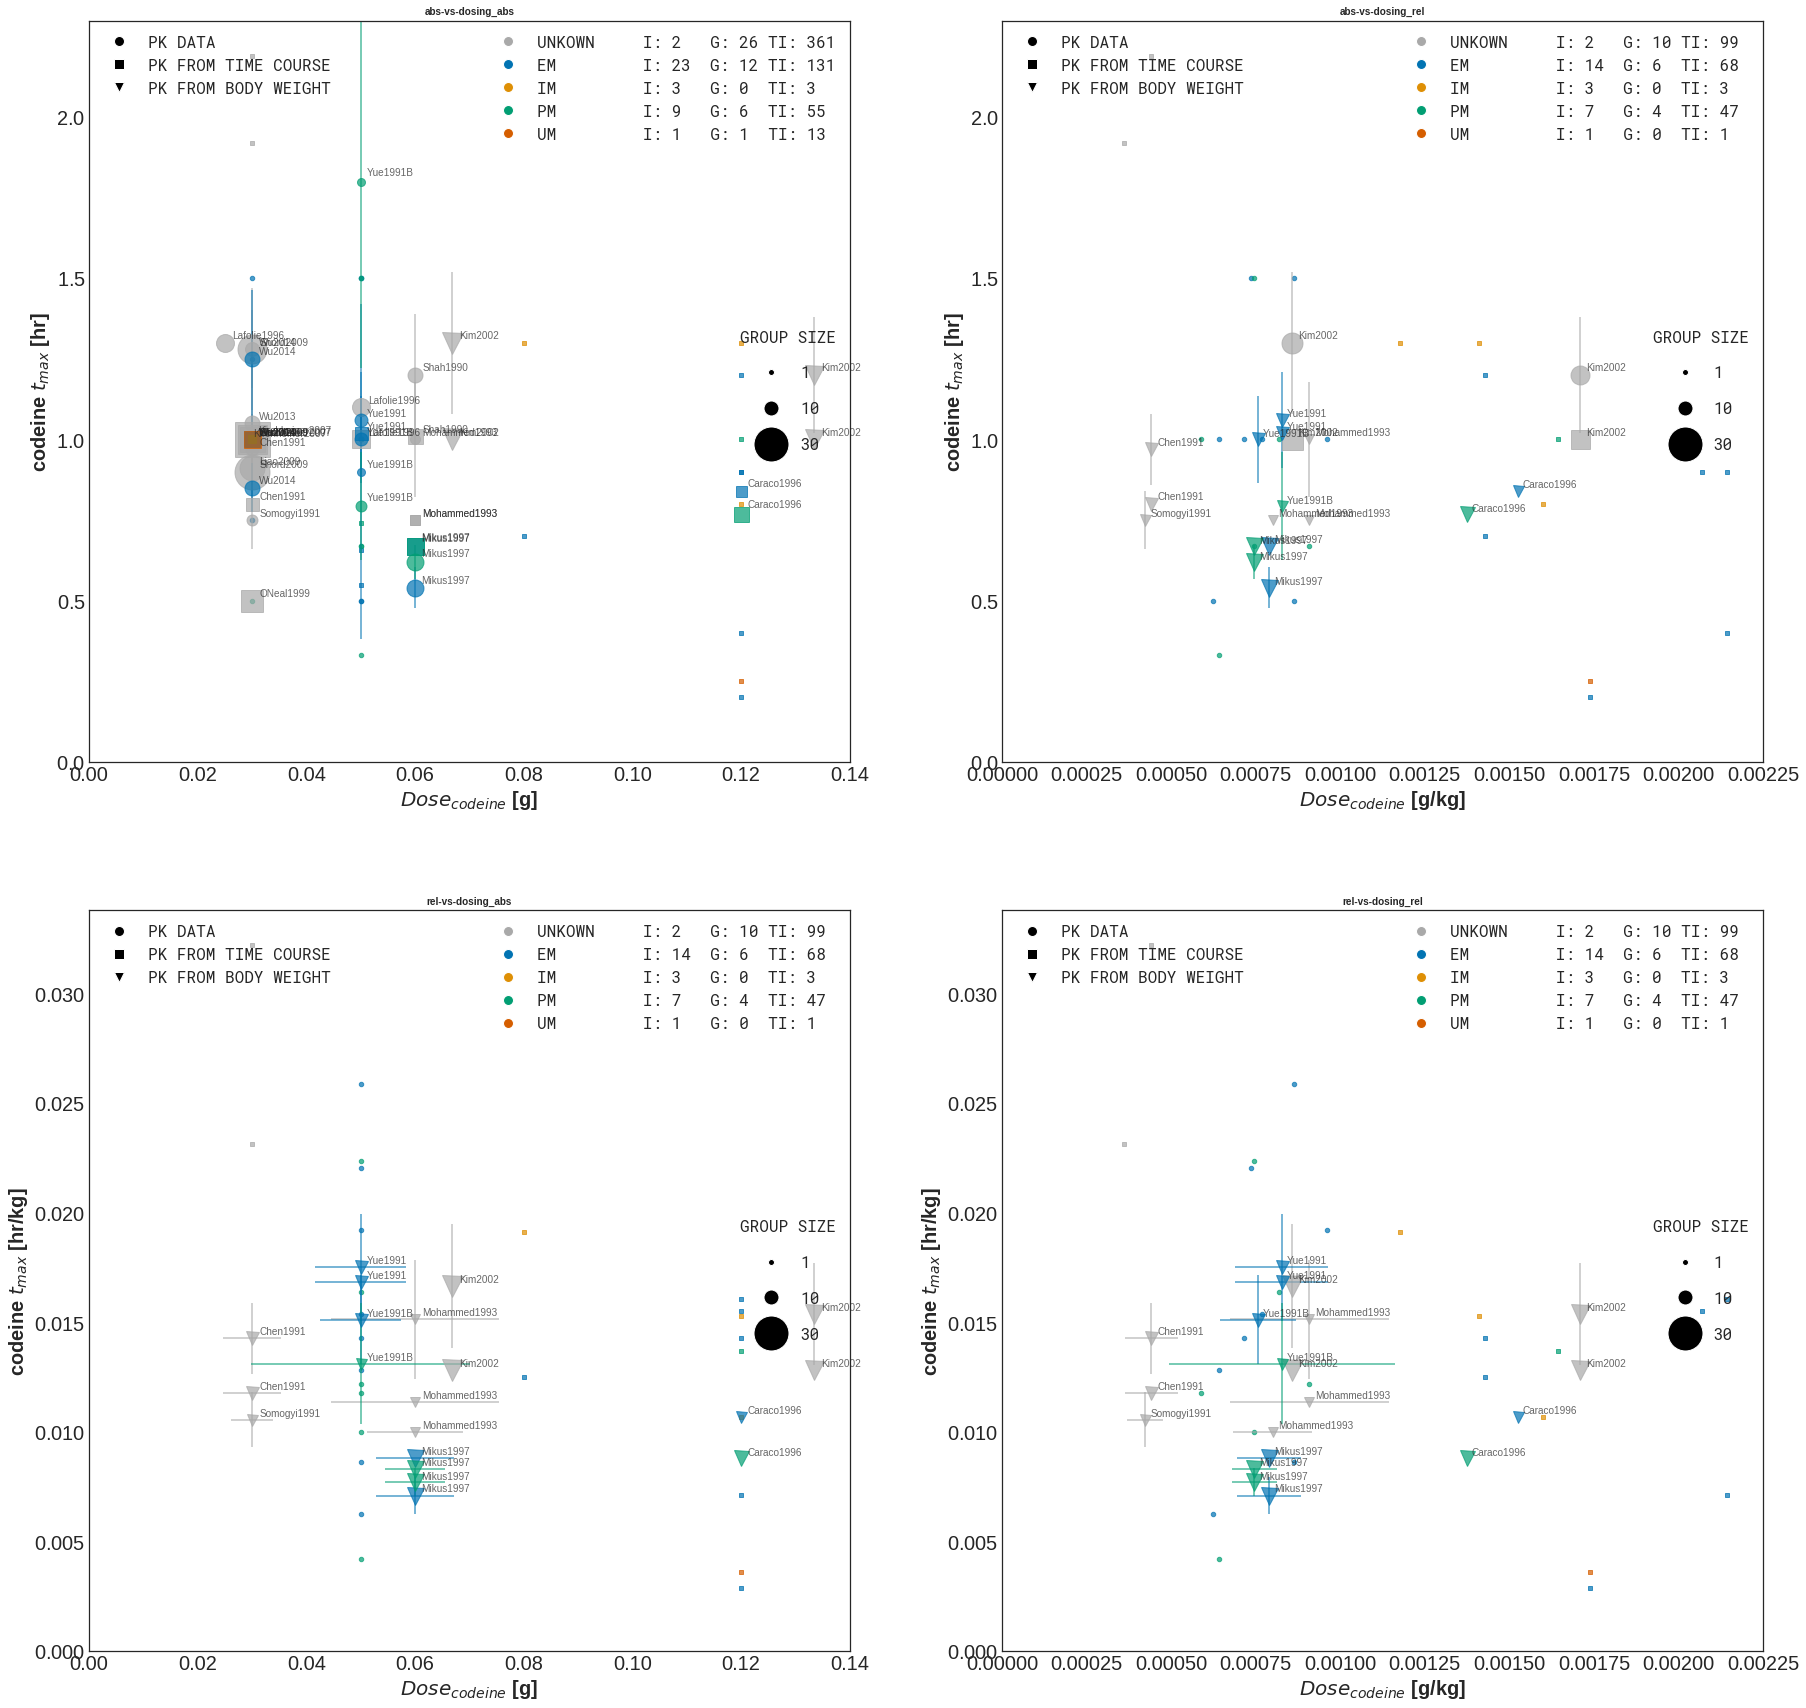

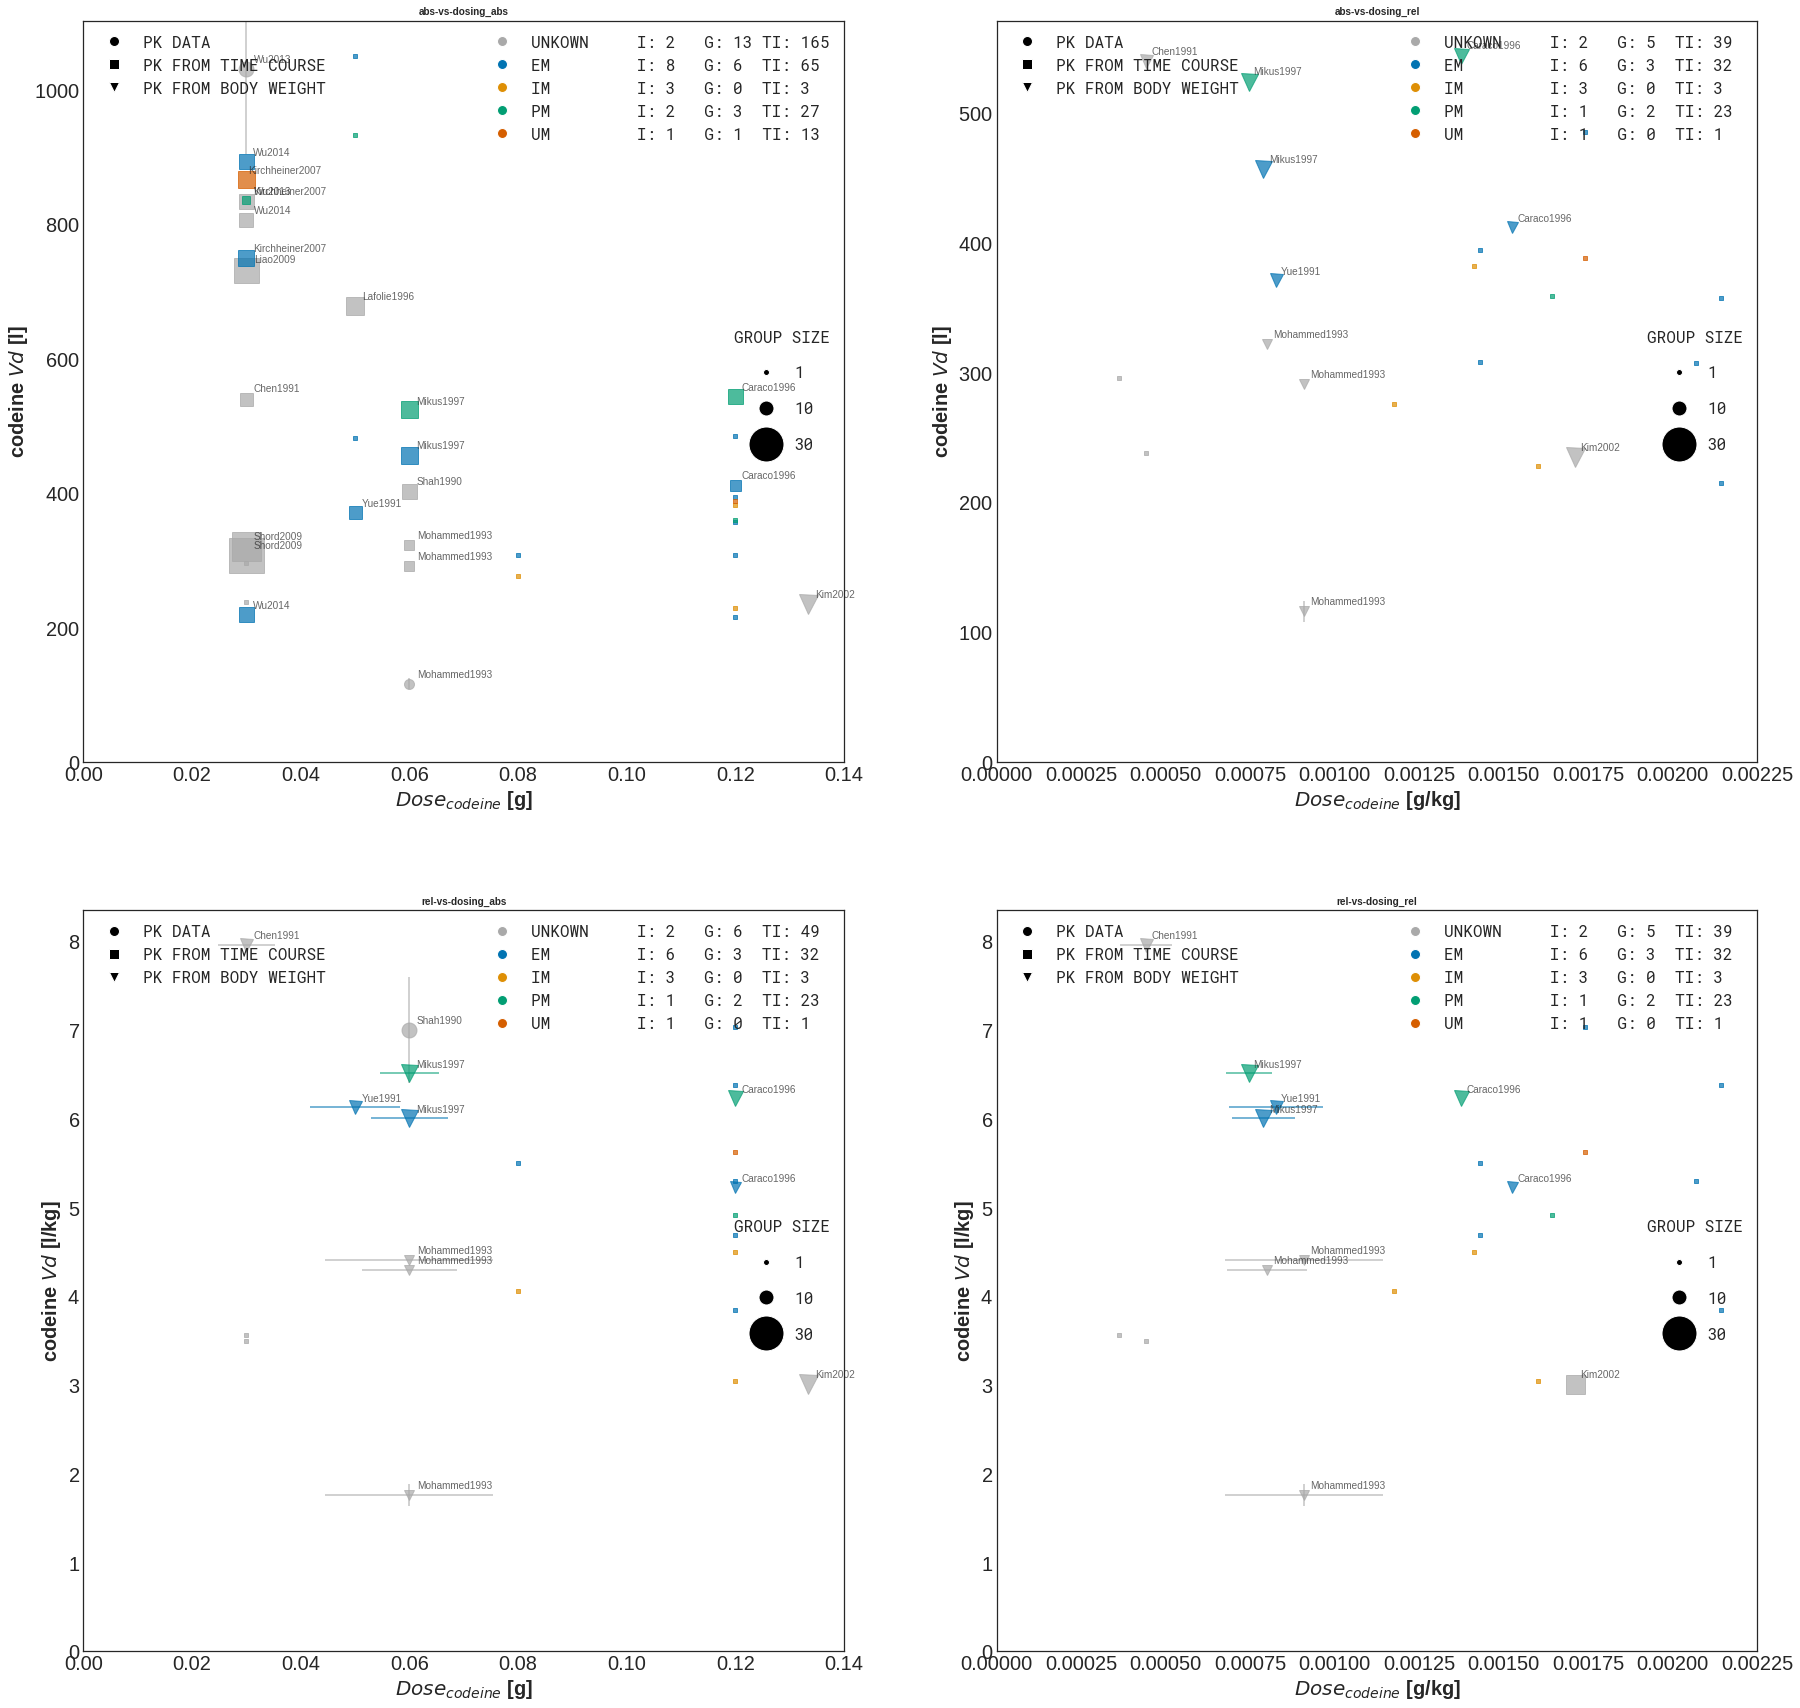

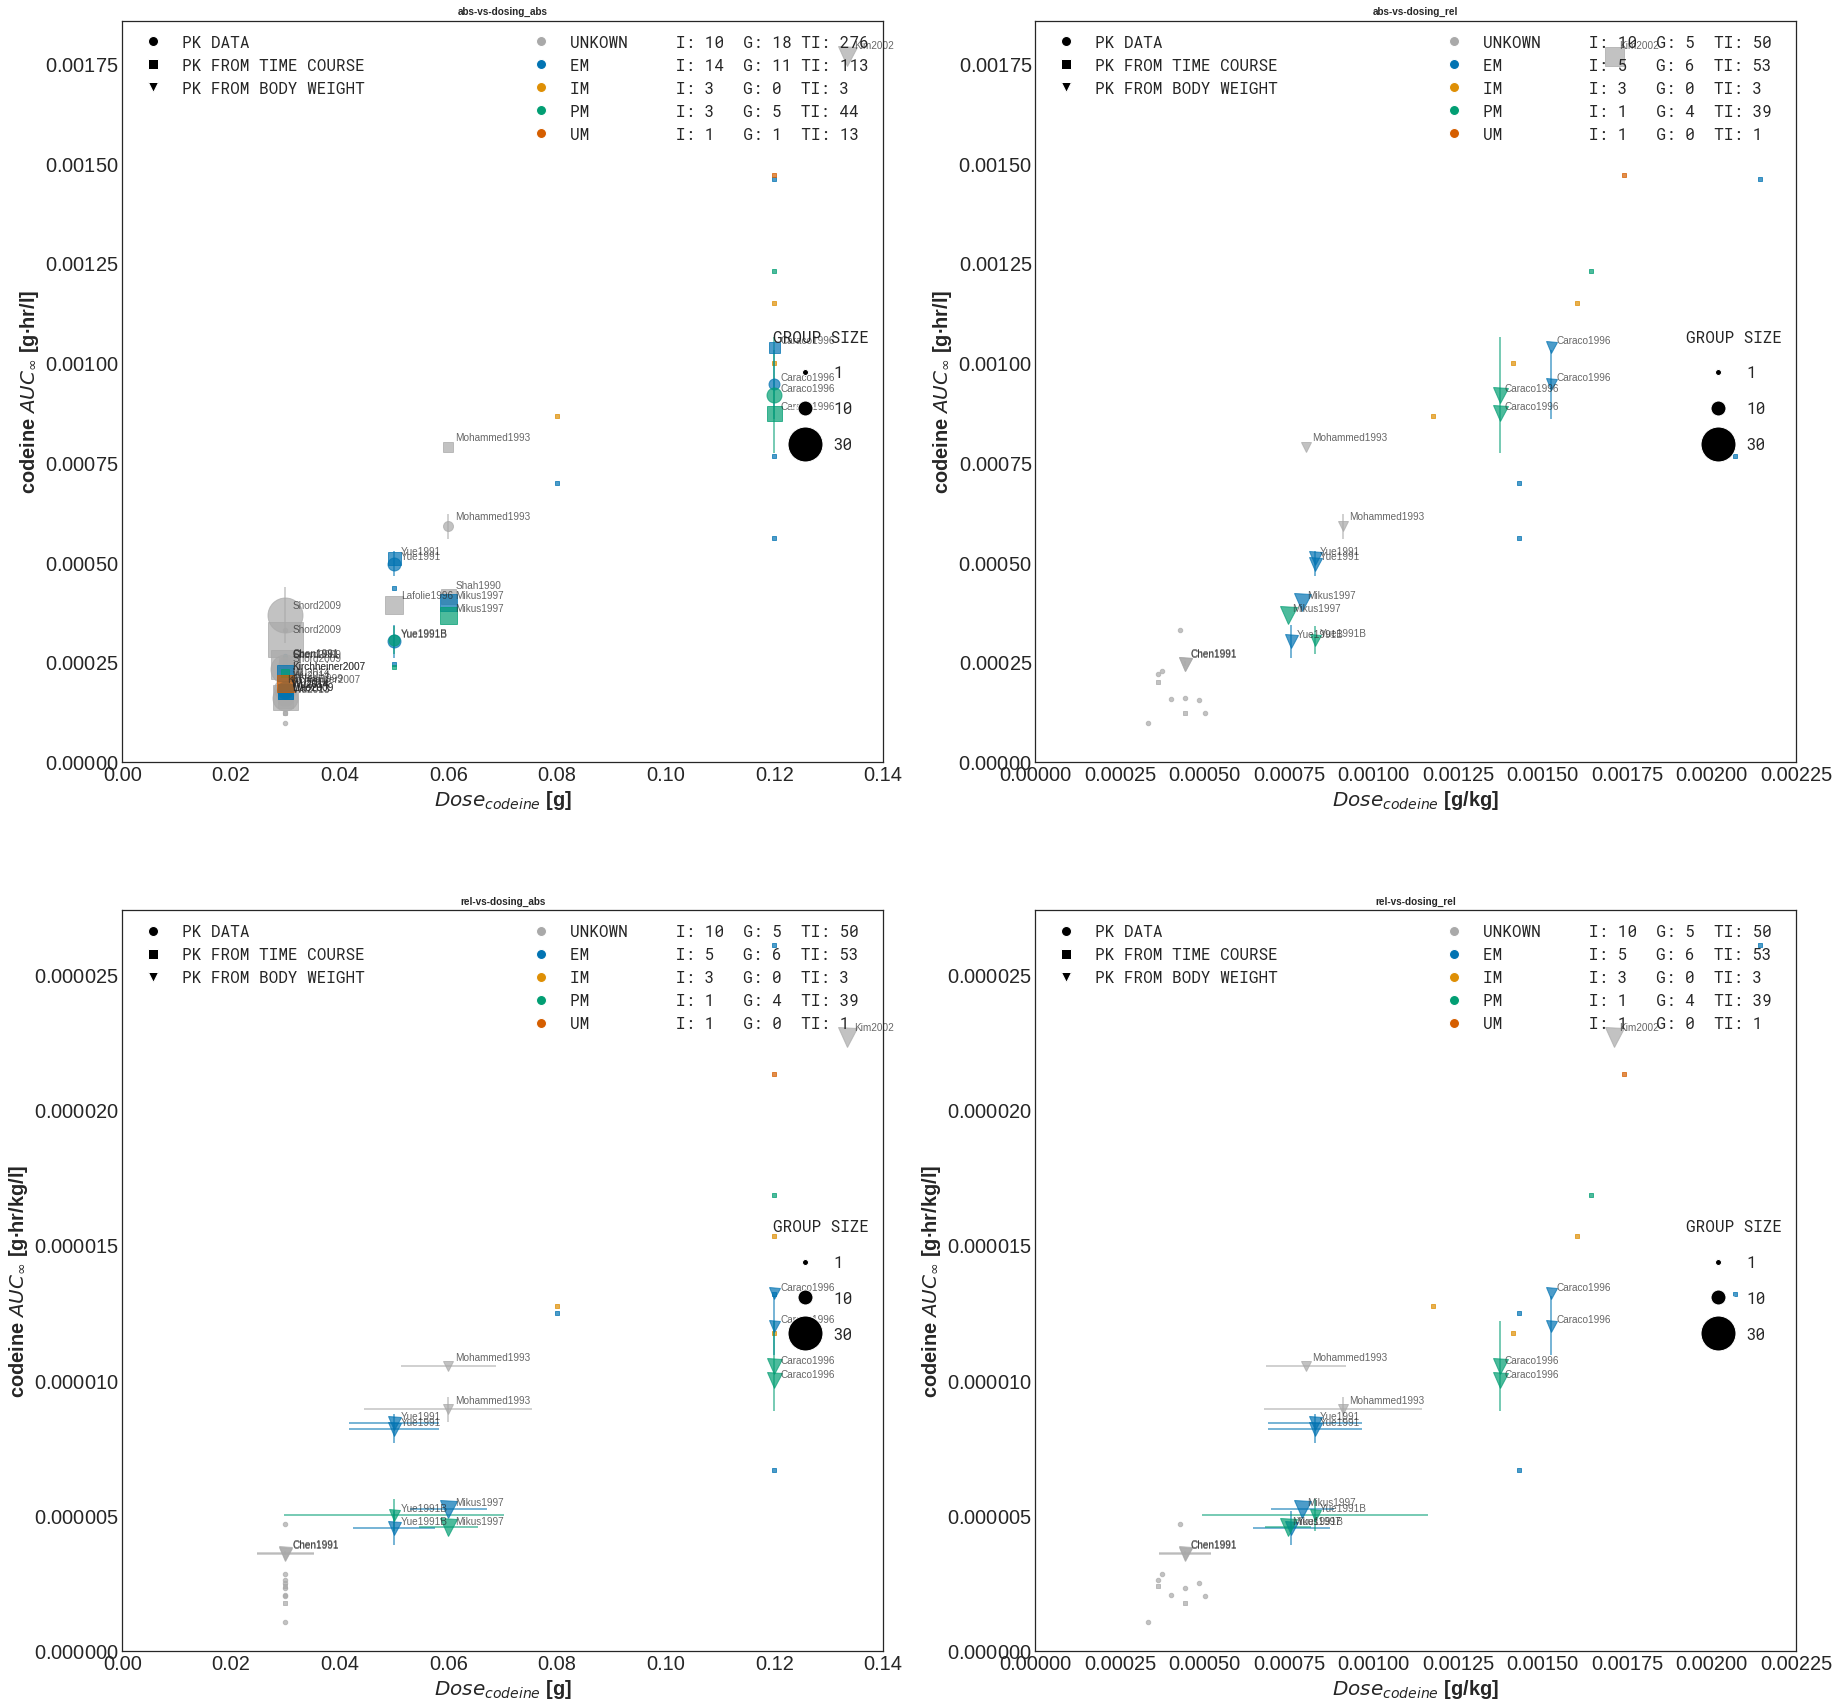

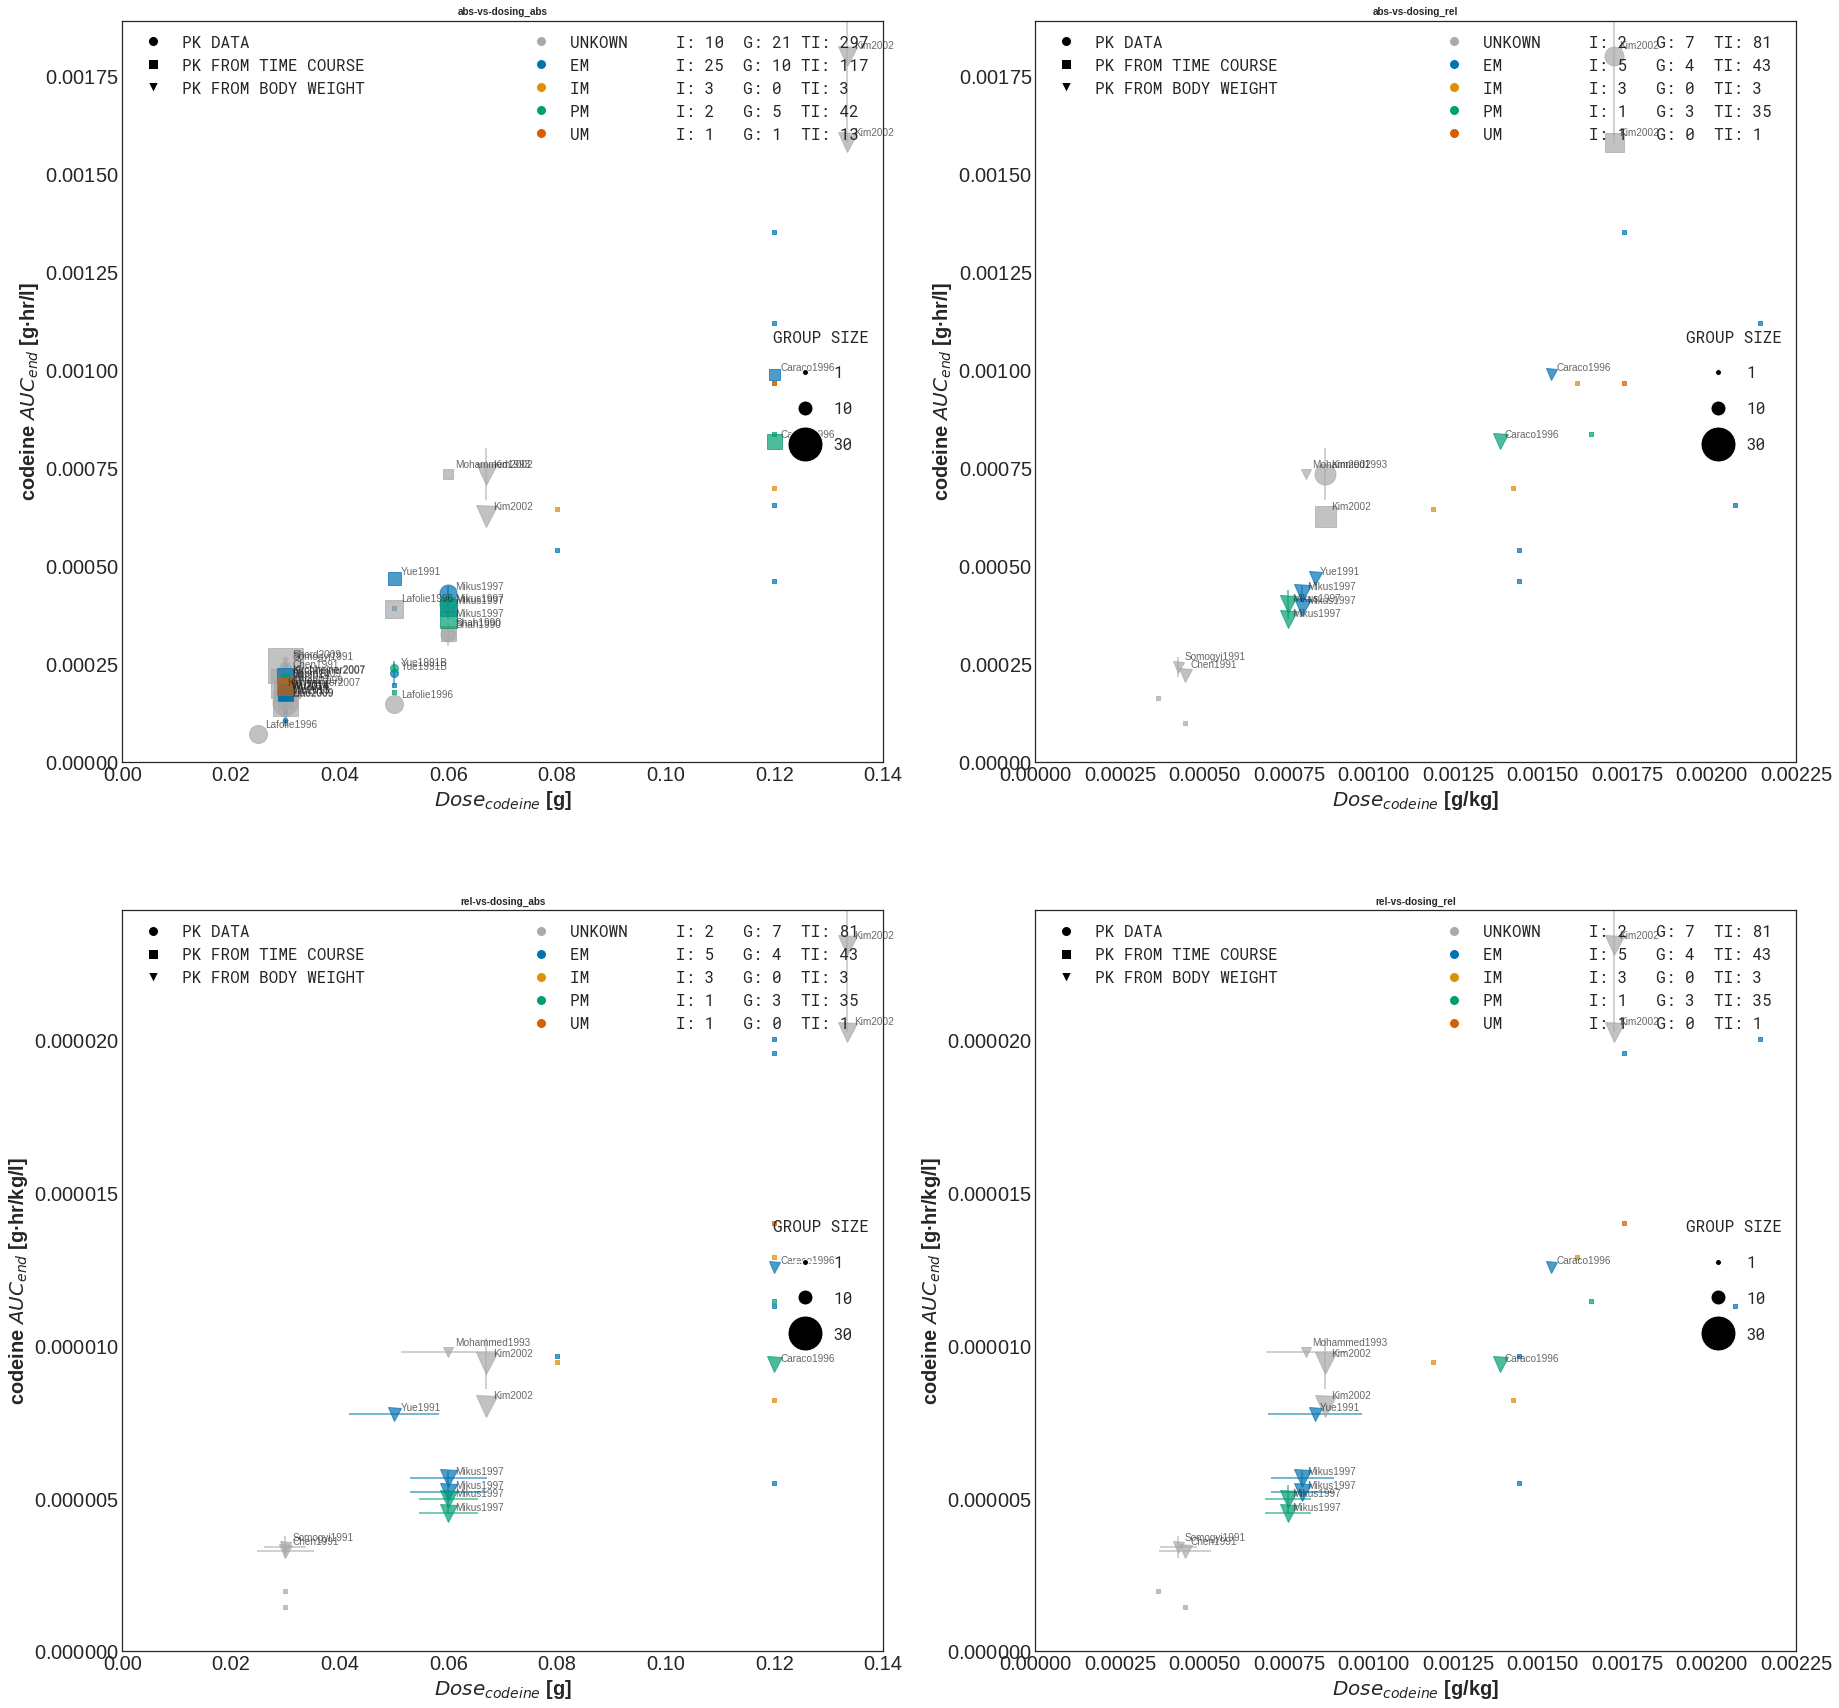

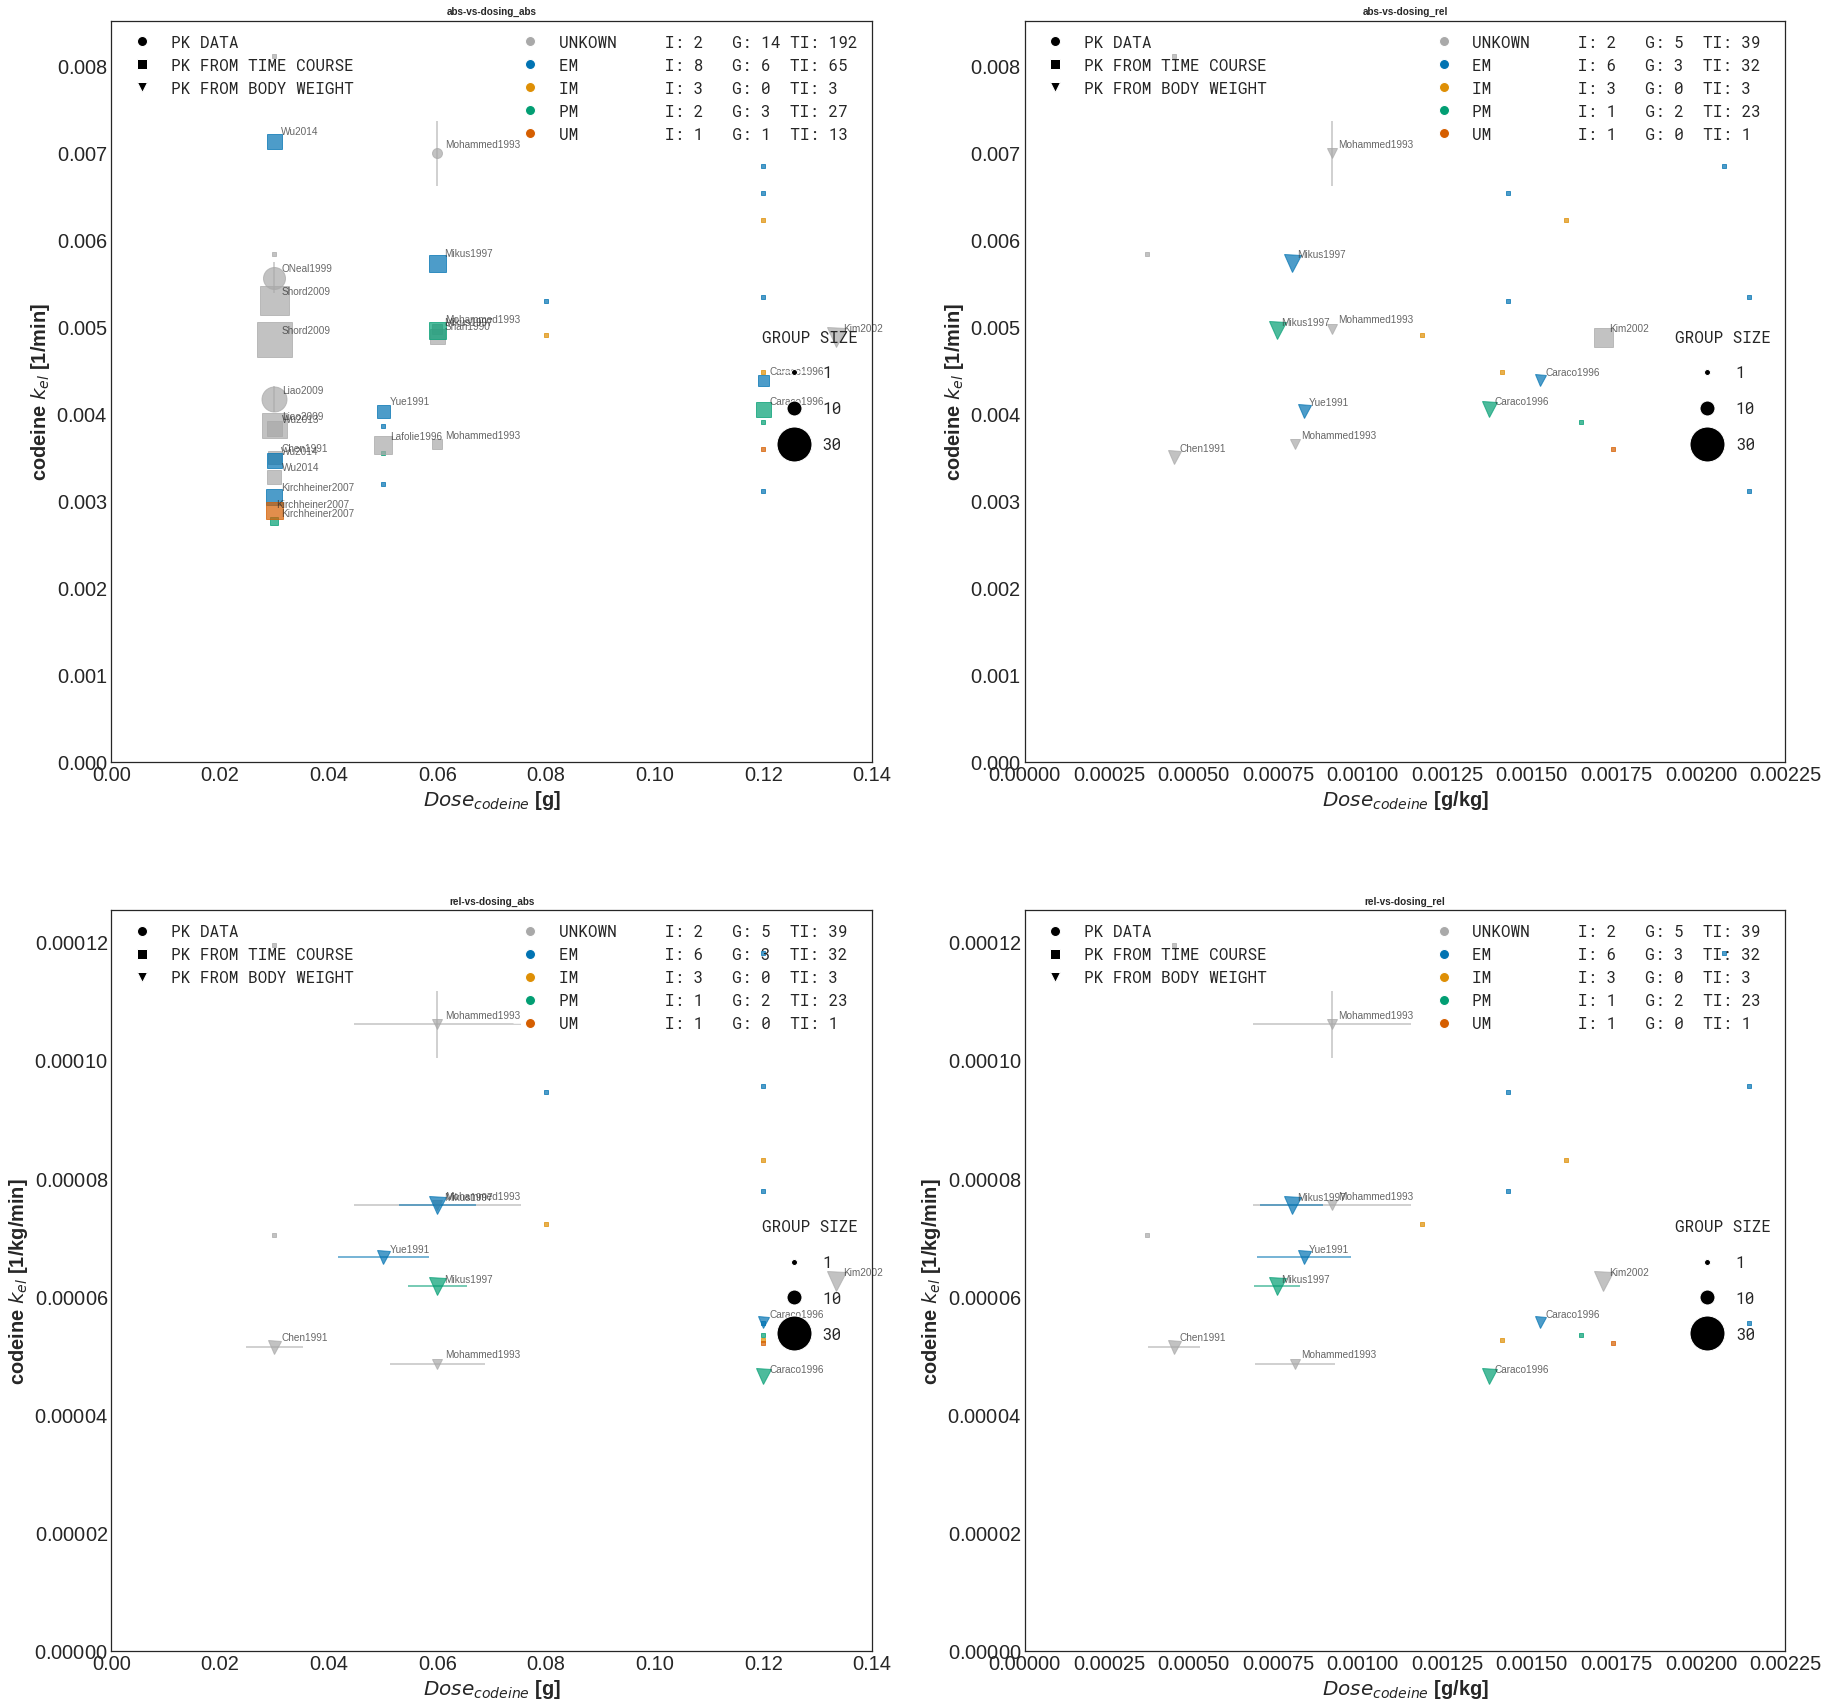

In [18]:
def analyses(substance):
    return [f"{substance}_clearance",
            f"{substance}_thalf",
            f"{substance}_tmax",
            f"{substance}_vd",
            f"{substance}_auc_inf",
            f"{substance}_auc_end",
            f"{substance}_kel"]

substances = [ "morphine", "codeine-6-glucuronide", "morphine-6-glucuronide", "morphine-3-glucuronide", "norcodeine", "normorphine","codeine"]
substances = ["codeine"]

for substance in substances:
    for analysis in analyses(substance):
        data_class = PkdbModel(analysis,destination="3-inferred")
        data_class.read()
        create_plots(data_class.data,categories_all,"reports/all")